In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import animation, rc,colors
from mpl_toolkits import mplot3d
import imageio
%matplotlib inline
rc('animation', html='jshtml')

In [108]:
# repare Data
def RandomData(NumberofCluster,N):
    cov2d = np.asarray([[1,0],[0,1]])*10
    cov3d = np.asarray([[1, 0,0], [0,1,0], [0,0,1]]) * 500
    X = []
    for i in range(NumberofCluster):
        mean = np.random.randint(-30,30,3)
        X.append(np.random.multivariate_normal(mean,cov3d,N))
    X = np.concatenate(X,axis = 0)
    return X
KCluster = 3
Data= RandomData(KCluster,50)

In [103]:
def Display(Data,Label,Center):
    ax.clear()
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.set_zlim(-50,50)
    K = np.amax(Label)
    Marker = ['^','o','s','*','h','D','p','X','P','1']
    for i in range(K+1):
        X = Data[Label == i,:]
        ax.scatter(X[:,0],X[:,1],X[:,2],marker=Marker[i%10],alpha = 1)
    for i in range(K+1):
        ax.scatter([Center[i][0]],[Center[i][1]],[Center[i][2]],s = 100,c = 'Yellow',marker = Marker[i%10])
    for i in range(Data.shape[0]):
        ax.plot([Data[i][0],Center[Label[i]][0]],[Data[i][1],Center[Label[i]][1]],[Data[i][2],Center[Label[i]][2]],color = 'red',linewidth=0.1)    
    plt.draw()

In [110]:
def kmeans_init_centers(Data, KCluster,Kind):
    if Kind == "Random":
        return Data[np.random.choice(Data.shape[0], KCluster, replace=False)]
    if Kind == "MinX":
        return Data[np.argsort(Data[:,0])[:KCluster]]
    if Kind == "MaxX":
        return Data[np.argsort(Data[:,0])[-KCluster:]]
    if Kind == "MinY":
        return Data[np.argsort(Data[:,1])[:KCluster]]
    if Kind == "MaxY":
        return Data[np.argsort(Data[:,1])[-KCluster:]]
    if Kind == "MinZ":
        return Data[np.argsort(Data[:,2])[:KCluster]]
    if Kind == "MaxZ":
        return Data[np.argsort(Data[:,2])[-KCluster:]]
def NewLabels (Data, Centers):
    NewLabel = np.argmin(cdist(Data, Centers),axis = 1)
    return NewLabel
def calCenter(Data,Label,KCluster):
    NewCenters = np.zeros((KCluster,Data.shape[1]))
    for k in range(KCluster):
        NewCenters[k,:]=np.mean(Data[Label==k,:],axis = 0)
    return NewCenters

[[-49.27083817   0.78839193  39.06263772]
 [-31.71748465   5.10366746  18.89391931]
 [ 15.93255899   2.04505579  26.94685916]]
[[-44.03692896  -6.37720035  42.64584617]
 [-27.16865932   2.98979706 -14.77460848]
 [  8.3541006    0.31651481   0.47023769]]
[[-36.6412807  -12.03794919  31.76411655]
 [-27.21025141   6.07159834 -23.99192142]
 [  5.60505661   0.82820623   4.1679806 ]]
[[-36.06769037 -14.04086049  23.82913715]
 [-26.77194017   9.85996487 -27.89563395]
 [  4.18164438   0.20709038   3.20437114]]
[[-35.56305089 -16.30139415  20.20817305]
 [-26.16987142  12.35835842 -29.06918548]
 [  3.89195204   1.05180234   2.26216521]]


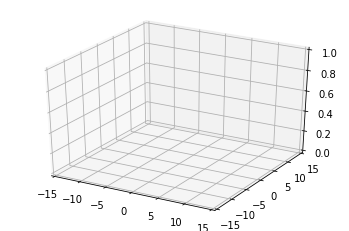

In [112]:
Centers = [kmeans_init_centers(Data,KCluster,"Random")]
Labels = []
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
img = []
def UpdateFig(i):
    Labels.append(NewLabels(Data,Centers[-1]))
    print(Centers[-1])
    Display(Data,Labels[-1],Centers[-1])
    NewCenters = calCenter(Data,Labels[-1],KCluster)
    Centers.append(NewCenters)
def Clear():
    ax.clear()
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
animation.FuncAnimation(fig,UpdateFig, range(5),Clear)